In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread

(739, 600, 4)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


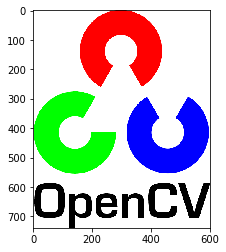

In [2]:
img = imread('OpenCV_Logo_with_text.png')
print(img.shape)
plt.imshow(img)
plt.show()

In [3]:
def padding(x, filter_size, pad='SAME'):
    if pad == 'SAME':
        pad_h_min = int(np.floor((filter_size - 1)/2))
        pad_h_max = int(np.ceil((filter_size - 1)/2))
        pad_w_min = int(np.floor((filter_size - 1)/2))
        pad_w_max = int(np.ceil((filter_size - 1)/2))
        pad_h, pad_w = (pad_h_min, pad_h_max), (pad_w_min, pad_w_max)
        return np.pad(x, (pad_h, pad_w, (0, 0)), mode='constant')
    else:
        return x
    
def get_shape(x, filter_size, stride):
    output_height = int((x.shape[0] - filter_size) / stride + 1)
    output_width = int((x.shape[1] - filter_size) / stride + 1)
    return int(output_height), int(output_width)

## Filter2D

In [4]:
filter_size = 5
kernel = np.ones((filter_size,filter_size),np.float32)/25
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

In [5]:
def filter2d(x, w, out, filter_size, stride, function):
    for z in range(x.shape[2]):
        h_range = int((x.shape[0] - filter_size) / stride + 1)
        for _h in range(h_range):
            w_range = int((x.shape[1] - filter_size) / stride + 1)
            for _w in range(w_range):
                out[_h, _w, z] = function(x[_h * stride:_h * stride + filter_size, 
                                          _w * stride:_w * stride + filter_size, z] * w)
    return out

In [6]:
y, x = get_shape(padding(img,filter_size),filter_size,1)
output_filter2d = np.zeros((y, x, img.shape[2]))
output_filter2d = filter2d(padding(img,filter_size),kernel,output_filter2d,filter_size,1,np.sum)

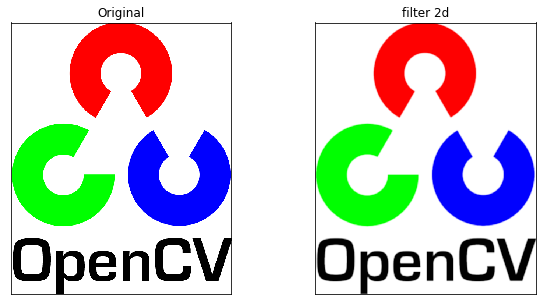

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output_filter2d.astype(int)),plt.title('filter 2d')
plt.xticks([]), plt.yticks([])
plt.show()

## image smoothing

In [8]:
def smoothing(x, out, filter_size, stride, function):
    for z in range(x.shape[2]):
        h_range = int((x.shape[0] - filter_size) / stride + 1)
        for _h in range(h_range):
            w_range = int((x.shape[1] - filter_size) / stride + 1)
            for _w in range(w_range):
                out[_h, _w, z] = function(x[_h * stride:_h * stride + filter_size, 
                                          _w * stride:_w * stride + filter_size, z])
    return out

In [9]:
y, x = get_shape(padding(img,filter_size),filter_size,1)
output_smoothing = np.zeros((y, x, img.shape[2]))
output_smoothing = smoothing(padding(img,filter_size),output_smoothing,filter_size,1,np.mean)

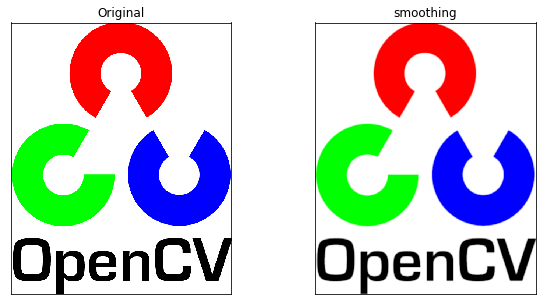

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output_smoothing.astype(int)),plt.title('smoothing')
plt.xticks([]), plt.yticks([])
plt.show()

## Gaussian filter

In [11]:
def gaussian_filter(shape =(5,5), sigma=1):
    x, y = [edge //2 for edge in shape]
    grid = np.array([[((i**2+j**2)/(2.0*sigma**2)) for i in range(-x, x+1)] for j in range(-y, y+1)])
    g_filter = np.exp(-grid)/(2*np.pi*sigma**2)
    g_filter /= np.sum(g_filter)
    return g_filter

In [12]:
kernel = gaussian_filter()
y, x = get_shape(padding(img,filter_size),filter_size,1)
output_filter2d = np.zeros((y, x, img.shape[2]))
output_filter2d = filter2d(padding(img,filter_size),kernel,output_filter2d,filter_size,1,np.sum)

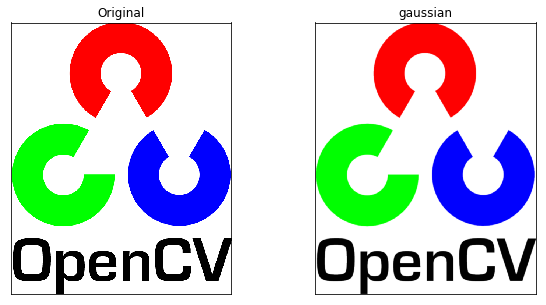

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output_filter2d.astype(int)),plt.title('gaussian')
plt.xticks([]), plt.yticks([])
plt.show()

## Median blurring

In [14]:
noise_img = (img * np.random.rand(img.shape[0],img.shape[1],img.shape[2])).astype(int)
y, x = get_shape(padding(noise_img,filter_size),filter_size,1)
output_smoothing = np.zeros((y, x, img.shape[2]))
output_smoothing = smoothing(padding(noise_img,filter_size),output_smoothing,filter_size,1,np.median)

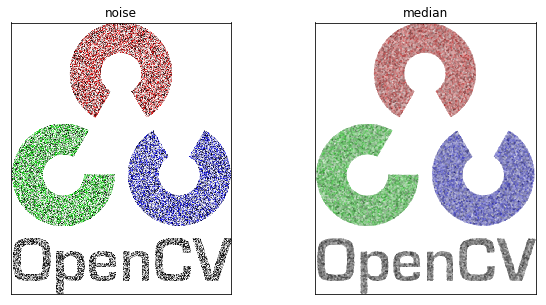

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(noise_img),plt.title('noise')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output_smoothing.astype(int)),plt.title('median')
plt.xticks([]), plt.yticks([])
plt.show()